In [2]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from small_script.myFunctions import *
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [3]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

In [48]:
def getContactMapFromPDB(pdbFile, n):
    # n = 472
    # pdbFile = "/Users/weilu/Research/server/oct_2019/draw_contact_for_DMP/5xr8_clean.pdb"
    cutoff = 9.5
    MAX_OFFSET = 0
    parser = PDBParser()
    structure = parser.get_structure('target', pdbFile)
    contact_table = np.ones((n,n)) * 99
    all_residues = list(structure.get_residues())
    for idx_i, res1 in enumerate(all_residues):
        i = res1.get_id()[1] - 1 
        for idx_j, res2 in enumerate(all_residues):
            j = res2.get_id()[1] - 1
            contact_table[i][j] = res1["CA"]-res2["CA"]

    data = (contact_table < cutoff)
    remove_band = np.eye(n)
    for i in range(1, MAX_OFFSET):
        remove_band += np.eye(n, k=i)
        remove_band += np.eye(n, k=-i)
    data[remove_band==1] = 0
    return data

In [49]:
fileLocation = "/Users/weilu/Research/server/oct_2019/draw_contact_for_DMP/cannabinoid_receptor.deepmetapsicov.con"
a, _ = get_contactFromDMP(fileLocation, 472)
n = 472
pdbFile = "/Users/weilu/Research/server/oct_2019/draw_contact_for_DMP/5xr8_clean.pdb"
data = getContactMapFromPDB(pdbFile, n)

In [50]:
pdbFile = "/Users/weilu/Research/server/oct_2019/draw_contact_for_DMP/lastFrame.pdb"
lastFrame = getContactMapFromPDB(pdbFile, n)

In [ ]:
data_s = data.astype(float)
t_s = lastFrame.astype(float)
combined = data_s + t_s * 2
from matplotlib import colors
# red is in crystal but not in predicted.
# blue is in predicted but not in crystal
# black is in both
cmap = colors.ListedColormap(['white', 'red', 'blue', 'black'])
bounds=[-1,0.1, 1.1, 2.1, 3.1]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(combined, origin="bottom", cmap=cmap, norm=norm)
plt.title("Red is only in crystal, Blue is only in Predicted")
# plt.savefig("/Users/weilu/Research/server/oct_2019/draw_contact_for_DMP/contact.png")

Text(0.5, 1.0, 'Red is only in crystal, Blue is only in Predicted')

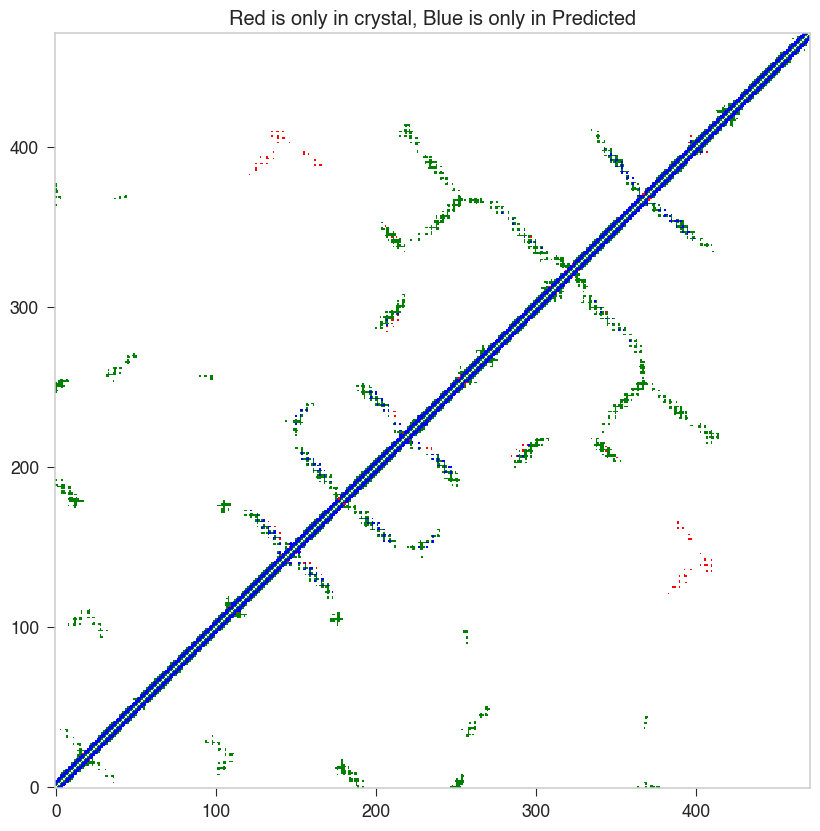

In [62]:
data_s = (a>0.5).astype(float)
t_s = lastFrame.astype(float)
combined = data_s + t_s * 2
from matplotlib import colors
# red is in crystal but not in predicted.
# blue is in predicted but not in crystal
# black is in both
cmap = colors.ListedColormap(['white', 'red', 'green', 'blue'])
# cmap = "Accent"
bounds=[-1,0.1, 1.1, 2.1, 3.1]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(combined, origin="bottom", cmap=cmap, norm=norm)
plt.title("Red is only in crystal, Blue is only in Predicted")
# plt.savefig("/Users/weilu/Research/server/oct_2019/draw_contact_for_DMP/contact.png")

array([[0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

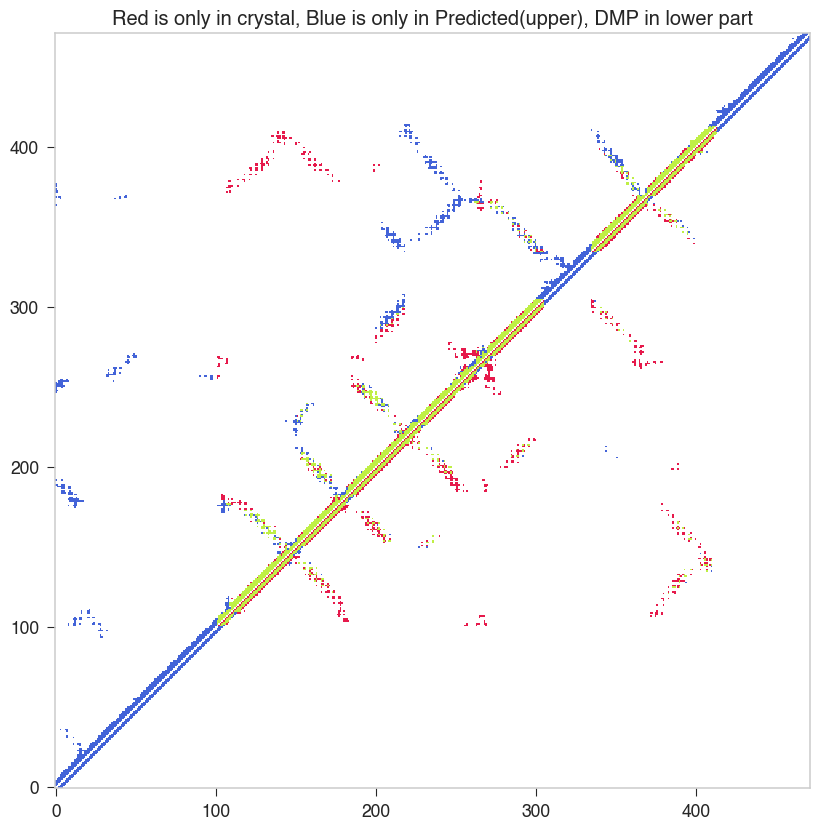

In [83]:
data_s = data.astype(float)
t_s = lastFrame.astype(float)
combined = data_s + t_s * 2
upper = combined * np.tri(n, k=-1)

data_s = data.astype(float)
t_s = (a>0.5).astype(float)
combined = data_s + t_s * 2
lower = combined * (1 - np.tri(n, k=0))
combined = upper + lower
from matplotlib import colors
# red is in crystal but not in predicted.
# blue is in predicted but not in crystal
# black is in both
cmap = colors.ListedColormap(['white', '#e6194B', '#4363d8', '#bfef45'])
# cmap = colors.ListedColormap(['white', 'red', 'blue', '#bfef45'])

bounds=[-1,0.1, 1.1, 2.1, 3.1]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(combined, origin="bottom", cmap=cmap, norm=norm)
plt.title("Red is only in crystal, Blue is only in Predicted(upper), DMP in lower part")
plt.savefig("/Users/weilu/Research/server/oct_2019/draw_contact_for_DMP/contact.png")

Text(0.5, 1.0, 'Red is only in crystal, Blue is only in Predicted')

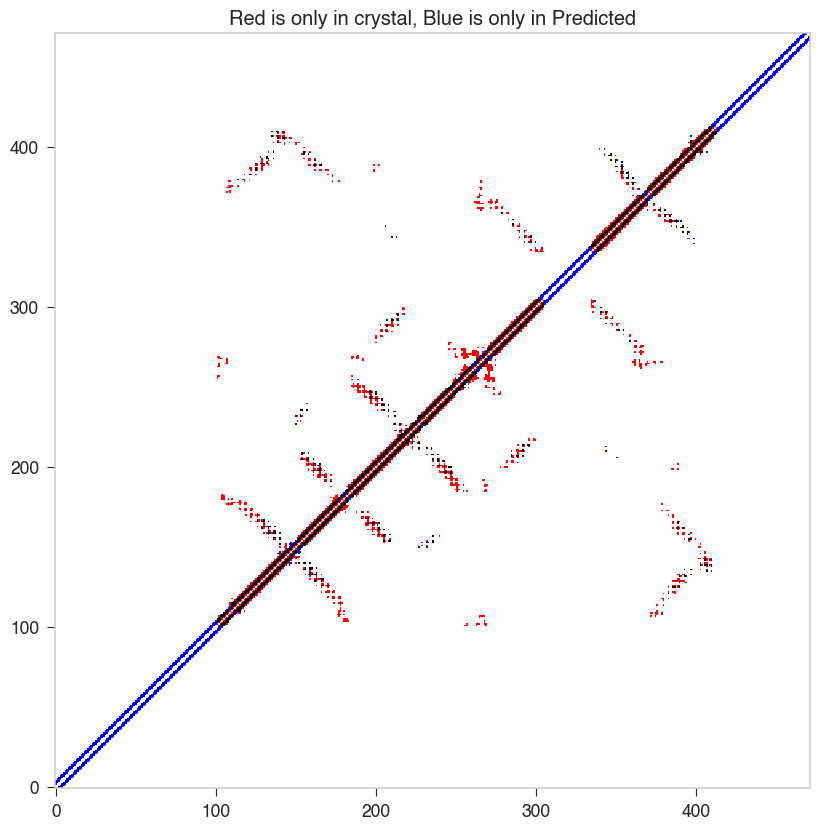

In [52]:
data_s = data.astype(float)
t_s = (a>0.5).astype(float)
combined = data_s + t_s * 2
from matplotlib import colors
# red is in crystal but not in predicted.
# blue is in predicted but not in crystal
# black is in both
cmap = colors.ListedColormap(['white', 'red', 'blue', 'black'])
bounds=[-1,0.1, 1.1, 2.1, 3.1]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(combined, origin="bottom", cmap=cmap, norm=norm)
plt.title("Red is only in crystal, Blue is only in Predicted")
# plt.savefig("/Users/weilu/Research/server/oct_2019/draw_contact_for_DMP/contact.png")

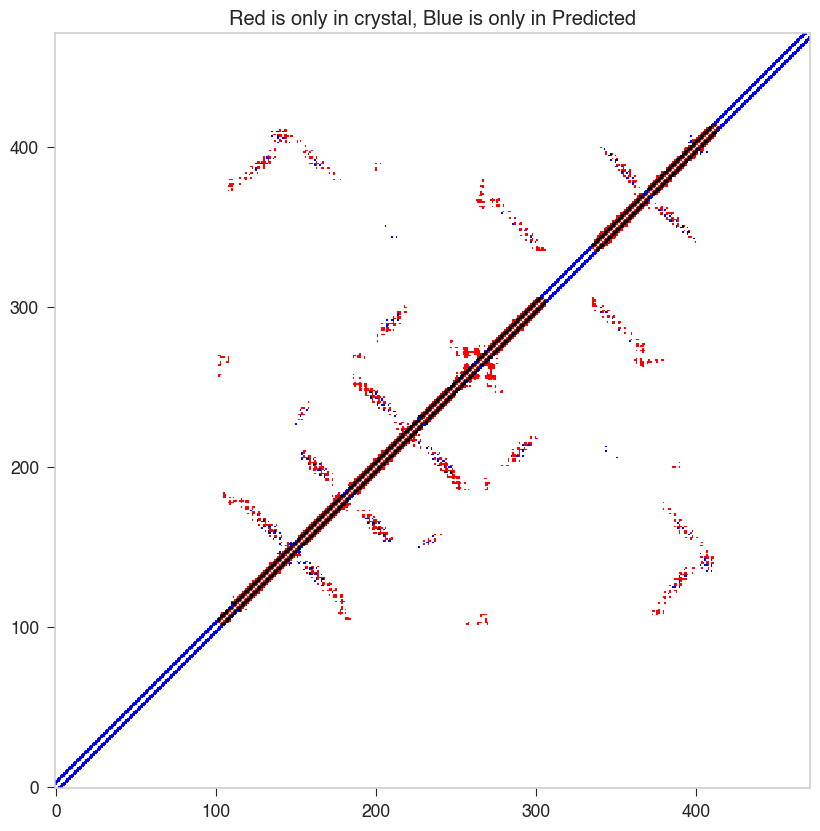

In [34]:
from matplotlib import colors
# red is in crystal but not in predicted.
# blue is in predicted but not in crystal
# black is in both
cmap = colors.ListedColormap(['white', 'red', 'blue', 'black'])
bounds=[-1,0.1, 1.1, 2.1, 3.1]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(combined, origin="bottom", cmap=cmap, norm=norm)
plt.title("Red is only in crystal, Blue is only in Predicted")
# plt.savefig("/Users/weilu/Research/server/oct_2019/draw_contact_for_DMP/contact.png")

In [ ]:
plt.imshow(a[300:,150:250], origin="bottom")
plt.colorbar()

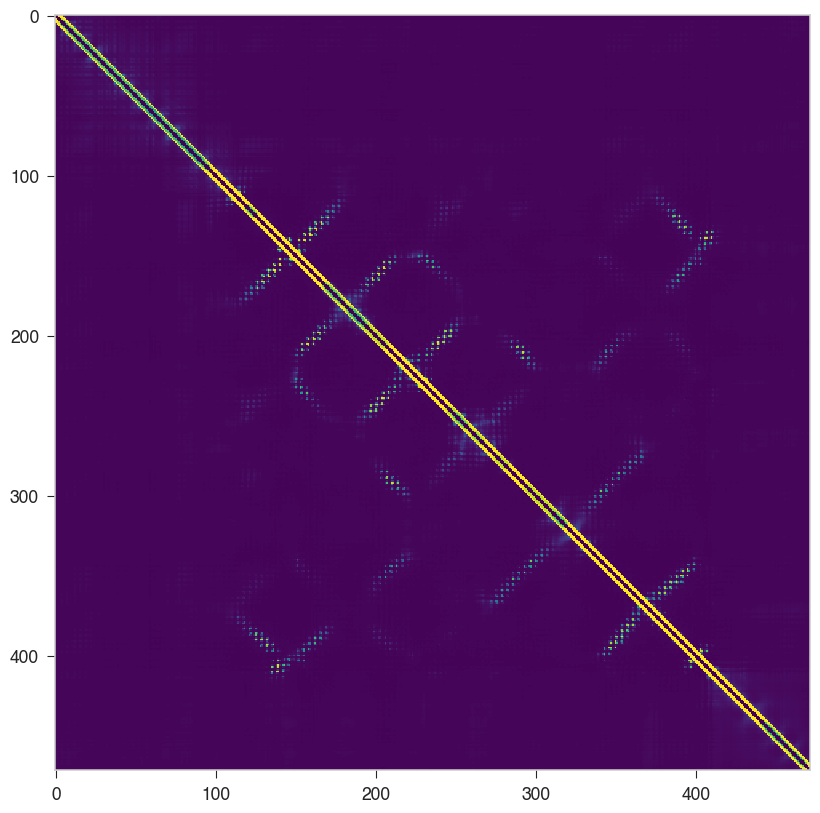

In [9]:
plt.imshow(a)

In [7]:
len(a[5])

51

In [22]:
pdb = "4rws"
fileLocation = f"/Users/weilu/Research/raptorX/{pdb}/A.txt"
data = pd.read_csv(fileLocation, skiprows=6, sep="\s+", names=["i","j","s", "ss","p"]).dropna().reset_index(drop=True)
data["i"] = data["i"].astype(int)
data["j"] = data["j"].astype(int)
data_A = data
seq_A = getSeqFromRaptorXContact(fileLocation)

fileLocation = f"/Users/weilu/Research/raptorX/{pdb}/B.txt"
data = pd.read_csv(fileLocation, skiprows=6, sep="\s+", names=["i","j","s", "ss","p"]).dropna().reset_index(drop=True)
data["i"] = data["i"].astype(int)
data["j"] = data["j"].astype(int)
data_B = data
seq_B = getSeqFromRaptorXContact(fileLocation)


In [86]:
import textwrap
header = '''\
PFRMAT RR
TARGET {}
AUTHOR RaptorX-Contact
METHOD deep dilated residual networks (one variant of deep CNN). Consult jinboxu@gmail.com for details.
MODEL 1
'''
fileLocation = f"/Users/weilu/Research/raptorX/{pdb}/{pdb}.txt"
with open(fileLocation, "w") as out:
    out.write(header.format(pdb))
    out.write("\n".join(textwrap.wrap(seq, width=50))+"\n")
    for index, d in data_A.iterrows():
    #     print(index)
        i = int(d["i"])
        j = int(d["j"])
        p = round(d["p"], 8)
        s = int(d["s"])
        ss = int(d["ss"])
        out.write(f"{i} {j} {s} {ss} {p}\n")
    for index, d in data_B.iterrows():
    #     print(index)
        i = int(d["i"]) + len(seq_A)
        j = int(d["j"]) + len(seq_A)
        p = round(d["p"], 8)
        s = int(d["s"])
        ss = int(d["ss"])
        out.write(f"{i} {j} {s} {ss} {p}\n")
    out.write("END\n")

In [80]:
for index, d in data_B.iterrows():
#     print(index)
    i = int(d["i"]) - 1 + len(seq_A)
    j = int(d["j"]) - 1 + len(seq_A)
    p = round(d["p"], 8)
    s = int(d["s"])
    ss = int(d["ss"])

In [84]:
data_A

,i,j,s,ss,p
0,34,59,0.0,8.0,0.997731
1,38,56,0.0,8.0,0.980999
2,41,52,0.0,8.0,0.973823
3,38,59,0.0,8.0,0.966630
4,27,66,0.0,8.0,0.962626
5,34,62,0.0,8.0,0.961573
6,35,59,0.0,8.0,0.916884
7,41,55,0.0,8.0,0.895539
8,31,63,0.0,8.0,0.874988
9,30,62,0.0,8.0,0.842116


In [79]:
round(p, 8)

0.0023355

In [23]:
seq = seq_A + seq_B

In [26]:
seq

'SMKEPCFREENANFNKIFLPTIYSIIFLTGIVGNGLVILVMGYQSMTDKYRLHLSVADLLFVITLPFWAVDAVANWYFGNFLCKAVHVIYTVNLYSSVWILAFISLDRYLAIVHATNSQRPRKLLAEKVVYVGVWIPALLLTIPDFIFANVSEADDRYICCRFYPNDLWVVVFQFQHIMVGLILPGIVILSCYCIIISKLSHSGHQKRKALKPTVILILAFFACWLPYYIGISIDSFILLEIIKQGCEFENTVHKWISITEALAFFHCCLNPILYALGASCHRPDKCCLGYQKRPLPQVLLSSWYPTSQLCSKPGVIFLTKRGRQVCADKSKDWVKKLMQQLPVTA'

In [27]:
n = len(seq)
t = np.zeros((n,n))
for index, d in data_A.iterrows():
#     print(index)
    i = int(d["i"]) - 1
    j = int(d["j"]) - 1 
    p = d["p"]
#     print(i,j,p)
    t[i,j] = p
    t[j,i] = p
for index, d in data_B.iterrows():
#     print(index)
    i = int(d["i"]) - 1 + len(seq_A)
    j = int(d["j"]) - 1 + len(seq_A)
    p = d["p"]
#     print(i,j,p)
    t[i,j] = p
    t[j,i] = p

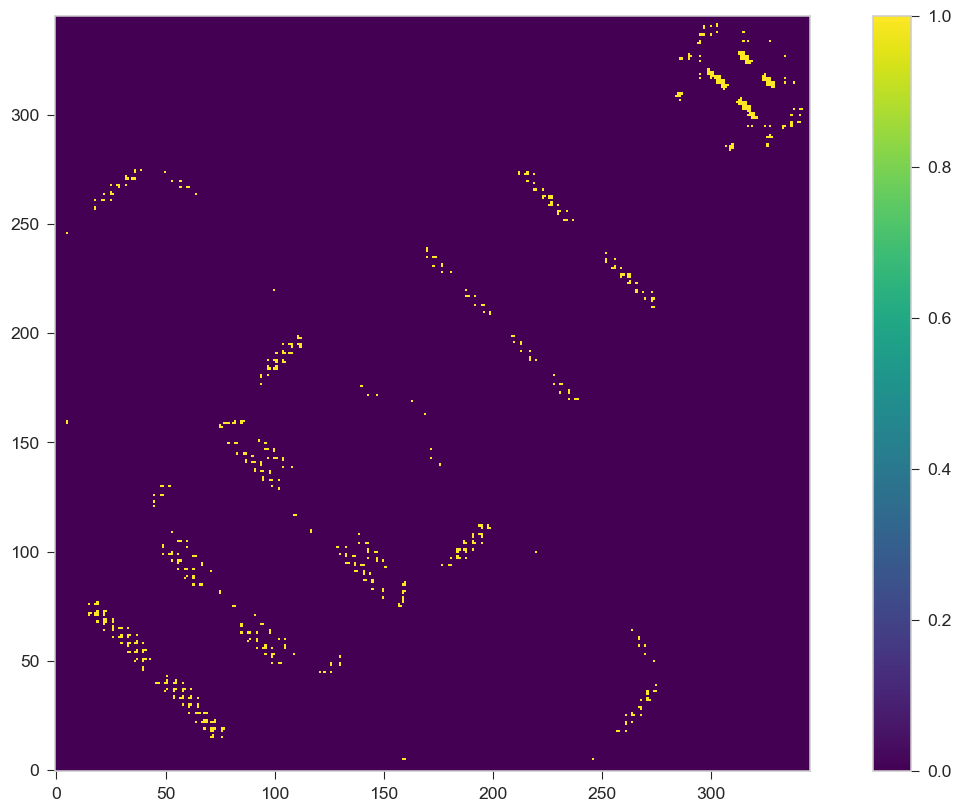

In [28]:
plt.imshow((t>0.5).astype(float), origin="bottom")
plt.colorbar()

In [29]:
def getSeqFromRaptorXContact(fileLocation):
    with open(fileLocation) as f:
        a = f.readlines()
    i = 4
    seq = ""
    assert a[i] == "MODEL 1\n"
    i += 1
    while True:
        line = a[i]
        if line[0].isdigit():
            break
        i += 1
        seq += line.strip()
    # print(i)
    return seq
def getContactMapFromPDB(pdbFile):
    cutoff = 9.5
    MAX_OFFSET = 6
    parser = PDBParser()
    structure = parser.get_structure('target', pdbFile)
    all_residues = list(structure.get_residues())
    n = len(all_residues)
    contact_table = np.zeros((n,n))
    print(pdb, n)
    for i, res1 in enumerate(all_residues):
        for j, res2 in enumerate(all_residues):
            contact_table[i][j] = res1["CA"]-res2["CA"]

    data = (contact_table < cutoff)
    remove_band = np.eye(n)
    for i in range(1, MAX_OFFSET):
        remove_band += np.eye(n, k=i)
        remove_band += np.eye(n, k=-i)
    data[remove_band==1] = 0
    return data

In [30]:
data = getContactMapFromPDB("/Users/weilu/Research/server/jul_2019/two_chains/cleaned_pdbs/4rws.pdb")

4rws 346


In [70]:
data_s = data.astype(int)
t_s = (t>0.55).astype(float)

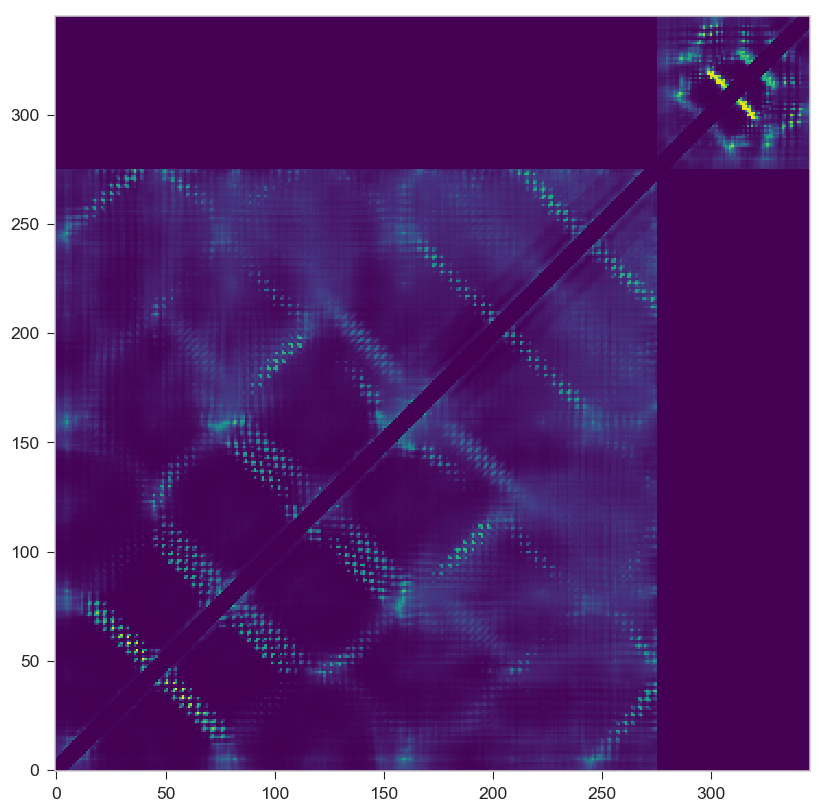

In [72]:
fig, ax = plt.subplots()
# ax.imshow(data_s+1, origin="bottom")
ax.imshow(t, origin="bottom")

In [60]:
combined = data_s + t_s * 2

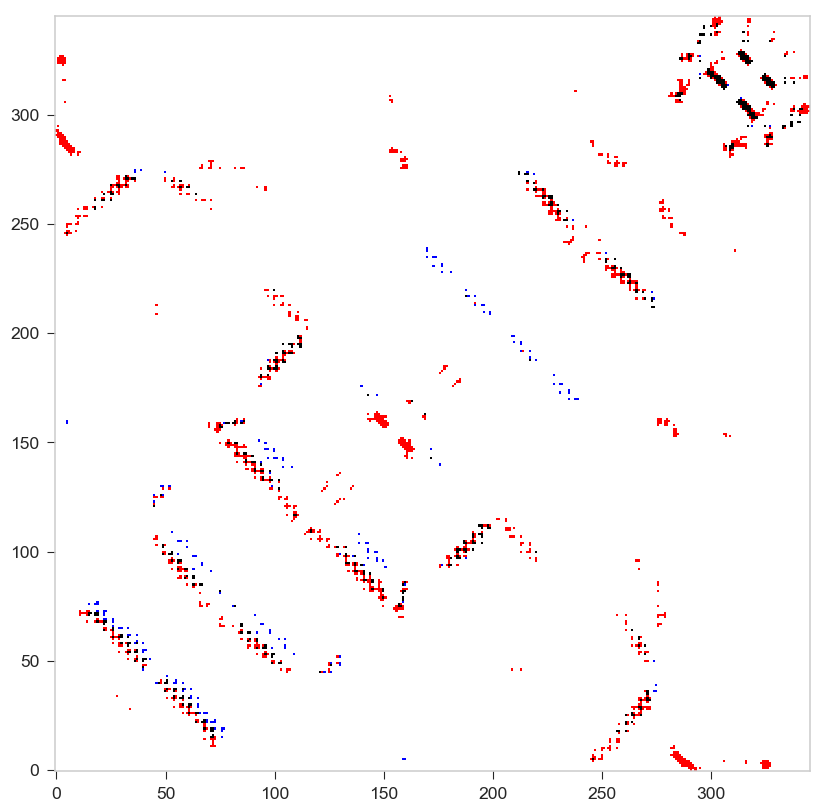

In [63]:
from matplotlib import colors
cmap = colors.ListedColormap(['white', 'red', 'blue', 'black'])
bounds=[-1,0.1, 1.1, 2.1, 3.1]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(combined, origin="bottom", cmap=cmap, norm=norm)

In [87]:
pdbFile = "/Users/weilu/Research/server/jul_2019/two_chains/cleaned_pdbs/4rws.pdb"
parser = PDBParser()
structure = parser.get_structure('target', pdbFile)

In [88]:
model = structure[0]

In [90]:
a = list(model.get_chains())

In [92]:
c = a[0]

In [94]:
c.id

'A'

In [95]:
c = "ALL"

In [99]:
"ABC" is not "ALL"

True

In [93]:
c.get_id()

'A'

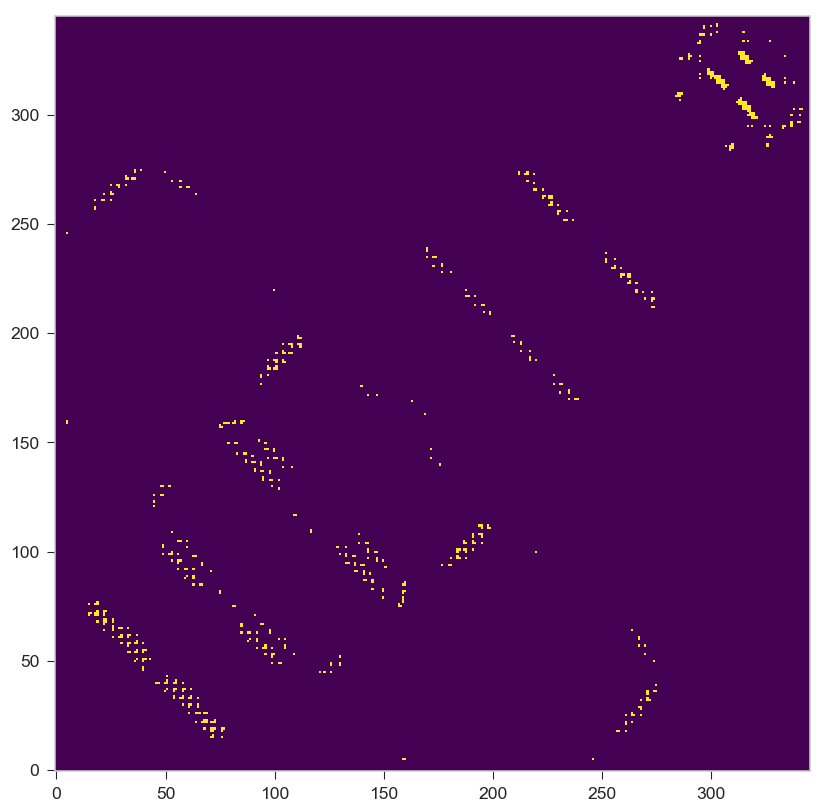

In [55]:
fig, ax = plt.subplots()
ax.imshow(data_s+1, origin="bottom")
ax.imshow(t_s, origin="bottom")

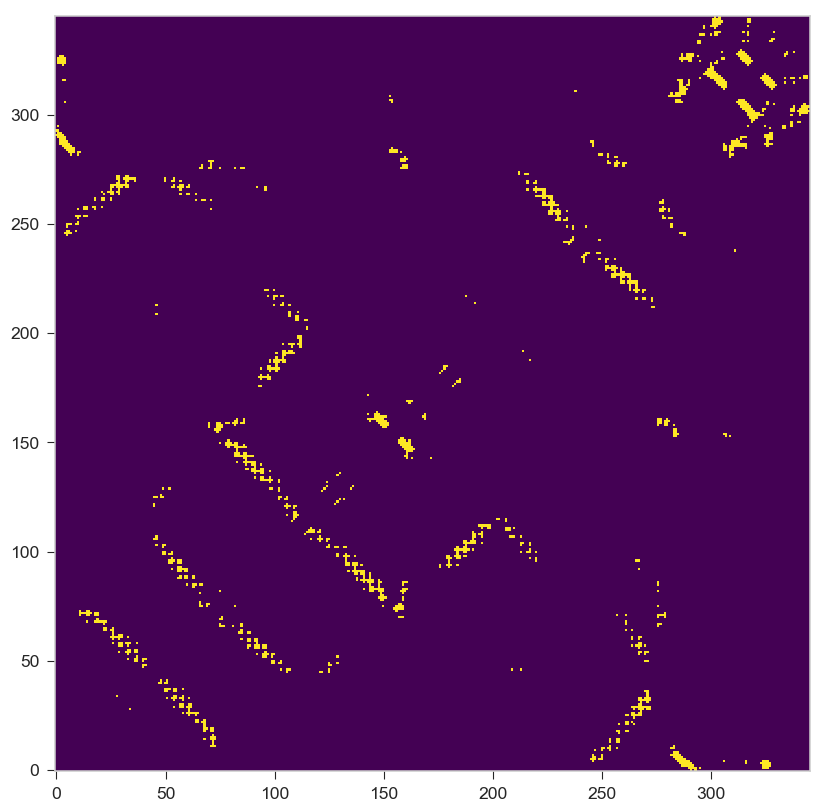

In [43]:
plt.imshow(data_s, origin="bottom")

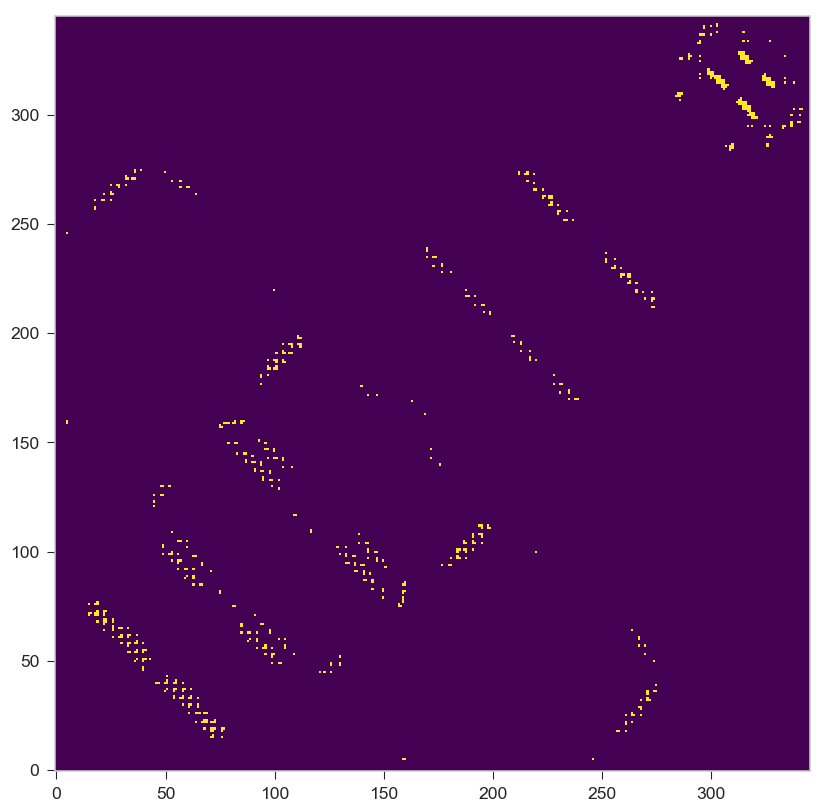

In [44]:
# plt.imshow(-data_s, origin="bottom")
plt.imshow(t_s, origin="bottom")
# plt.colorbar()

In [16]:
346

70

In [17]:
fileLocation = f"/Users/weilu/Research/raptorX/{pdb}/B.txt"

In [20]:
len(seq)

276

In [18]:
pdb = "4rws"
fileLocation = f"/Users/weilu/Research/raptorX/{pdb}/A.txt"
data = pd.read_csv(fileLocation, skiprows=6, sep="\s+", names=["i","j","s", "ss","p"]).dropna().reset_index(drop=True)
data["i"] = data["i"].astype(int)
data["j"] = data["j"].astype(int)
n = int(info.query(f"Protein =='{pdb}'")["Length"])
t = np.zeros((n,n))
for index, d in data.iterrows():
#     print(index)
    i = int(d["i"]) - 1
    j = int(d["j"]) - 1 
    p = d["p"]
#     print(i,j,p)
    t[i,j] = p
    t[j,i] = p

NameError: name 'info' is not defined

In [ ]:
def getContactMap(pdb):
    fileLocation = f"/Users/weilu/Research/raptorX/{pdb}/contactmap.txt"
    data = pd.read_csv(fileLocation, skiprows=6, sep="\s+", names=["i","j","s", "ss","p"]).dropna().reset_index(drop=True)
    data["i"] = data["i"].astype(int)
    data["j"] = data["j"].astype(int)
    n = int(info.query(f"Protein =='{pdb}'")["Length"])
    t = np.zeros((n,n))
    for index, d in data.iterrows():
    #     print(index)
        i = int(d["i"]) - 1
        j = int(d["j"]) - 1 
        p = d["p"]
    #     print(i,j,p)
        t[i,j] = p
        t[j,i] = p